RFM analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

RECENCY (R): Days since last purchase

FREQUENCY (F): Total number of purchases

MONETARY VALUE (M): Total money this customer spent.


In [0]:
import pandas as pd 

In [0]:
Model = pd.read_csv("/content/drive/My Drive/OG datasets/orders.csv")

In [4]:
Model

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


# Recency

Avg of how many days ago was the User's last purchase.

In [11]:
recency_df = Model.groupby(by='user_id', as_index=False)['days_since_prior_order'].mean().astype(int) 
recency_df.columns = ['user_id','days_since_prior_order']
recency_df.head()

,user_id,days_since_prior_order
0,1,19
1,2,16
2,3,12
3,4,17
4,5,11


In [14]:
recency_df['Recency'] = recency_df['days_since_prior_order']
recency_df.drop('days_since_prior_order',axis=1,inplace=True)
recency_df

,user_id,Recency
0,1,19
1,2,16
2,3,12
3,4,17
4,5,11
...,...,...
206204,206205,16
206205,206206,3
206206,206207,14
206207,206208,7


# Frequency
How many times a User purchased from Instacart

In [15]:
frequency_df = Model.groupby(by='user_id', as_index=False)['order_number'].max()
frequency_df.columns = ['user_id','order_number']
frequency_df.head()

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5


In [16]:
frequency_df['Frequency'] = frequency_df['order_number']
frequency_df.drop('order_number',axis=1,inplace=True)
frequency_df

,user_id,Frequency
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
...,...,...
206204,206205,4
206205,206206,68
206206,206207,17
206207,206208,50


# **Monetary**

How much money did the User spent over time.Creating a random value column to represent Total Price


In [22]:
import random
import numpy as np

frequency_df['Total Price'] = np.random.randint(100,1200, size=206209)/10
frequency_df

,user_id,Frequency,Total Price
0,1,11,12.8
1,2,15,29.6
2,3,13,82.3
3,4,6,89.6
4,5,5,41.8
...,...,...,...
206204,206205,4,82.1
206205,206206,68,55.8
206206,206207,17,62.8
206207,206208,50,118.7


In [0]:
frequency_df['Monetary'] = frequency_df['Total Price']

In [39]:
Merge_df = recency_df.merge(frequency_df,on='user_id')
Merge_df.drop('Total Price',axis=1,inplace=True)
Merge_df

,user_id,Recency,Frequency,Monetary
0,1,19,11,12.8
1,2,16,15,29.6
2,3,12,13,82.3
3,4,17,6,89.6
4,5,11,5,41.8
...,...,...,...,...
206204,206205,16,4,82.1
206205,206206,3,68,55.8
206206,206207,14,17,62.8
206207,206208,7,50,118.7


# Customer Segment with RFM Model

Calculating RFM using Quartiles. 

Assigning a score from 1 to 4 to Recency, Frequency and Monetary. Four is the highest value, and one is the lowest value. A final RFM score is calculated by combining individual RFM score numbers.

In [40]:
quantiles = Merge_df.quantile(q=[0.25,0.5,0.75])
quantiles

,user_id,Recency,Frequency,Monetary
0.25,51553.0,9.0,6.0,37.5
0.50,103105.0,15.0,10.0,65.0
0.75,154657.0,20.0,20.0,92.4


In [29]:
quantiles.to_dict()


{'Frequency': {0.25: 6.0, 0.5: 10.0, 0.75: 20.0},
 'Monetary': {0.25: 37.5, 0.5: 65.0, 0.75: 92.4},
 'Recency': {0.25: 9.0, 0.5: 15.0, 0.75: 20.0},
 'user_id': {0.25: 51553.0, 0.5: 103105.0, 0.75: 154657.0}}

Creating 2 segment since ideally we want high frequency and monetary but low recency. 
(x = value, p = recency, monetary_value, frequency, d = quartiles dict)



In [0]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [0]:
rfm_segmentation = Merge_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [32]:
rfm_segmentation.head()


,user_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
0,1,19,11,12.8,2,3,1
1,2,16,15,29.6,2,3,1
2,3,12,13,82.3,3,3,3
3,4,17,6,89.6,2,1,3
4,5,11,5,41.8,3,1,2


To represent customer segmentation, Combining the scores (R_Quartile, F_Quartile,M_Quartile) together.

Best Recency score = 4: most recently purchase.

Best Frequency score = 4: most quantity purchase. 

Best Monetary score = 4: spent the most.

In [33]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,user_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,1,19,11,12.8,2,3,1,231
1,2,16,15,29.6,2,3,1,231
2,3,12,13,82.3,3,3,3,333
3,4,17,6,89.6,2,1,3,213
4,5,11,5,41.8,3,1,2,312


In [34]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,user_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
104291,104292,9,37,119.9,4,4,4,444
157354,157355,9,29,119.9,4,4,4,444
153679,153680,5,46,119.9,4,4,4,444
174930,174931,5,70,119.9,4,4,4,444
60260,60261,9,40,119.9,4,4,4,444
79258,79259,6,60,119.9,4,4,4,444
124990,124991,1,100,119.9,4,4,4,444
173321,173322,8,33,119.9,4,4,4,444
59271,59272,8,30,119.9,4,4,4,444
173317,173318,6,36,119.9,4,4,4,444


Customers in each Segment 


In [42]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))


Best Customers:  7904
Loyal Customers:  50731
Big Spenders:  51529
Almost Lost:  190
Lost Customers:  7235


In [0]:
rfm_segmentation['Total Score'] = rfm_segmentation['R_Quartile'] + rfm_segmentation['F_Quartile'] +rfm_segmentation['M_Quartile']

In [56]:
rfm_segmentation

,user_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total Score
0,1,19,11,12.8,2,3,1,231,6
1,2,16,15,29.6,2,3,1,231,6
2,3,12,13,82.3,3,3,3,333,9
3,4,17,6,89.6,2,1,3,213,6
4,5,11,5,41.8,3,1,2,312,6
...,...,...,...,...,...,...,...,...,...
206204,206205,16,4,82.1,2,1,3,213,6
206205,206206,3,68,55.8,4,4,2,442,10
206206,206207,14,17,62.8,3,3,2,332,8
206207,206208,7,50,118.7,4,4,4,444,12


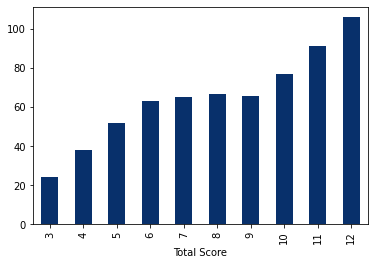

In [59]:
rfm_segmentation.groupby('Total Score').agg('Monetary').mean().plot(kind='bar', colormap='Blues_r')

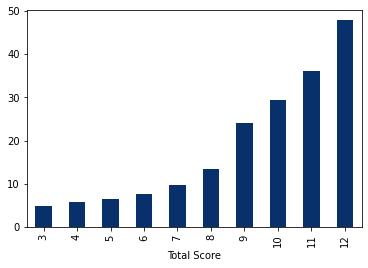

In [60]:
rfm_segmentation.groupby('Total Score').agg('Frequency').mean().plot(kind='bar', colormap='Blues_r')

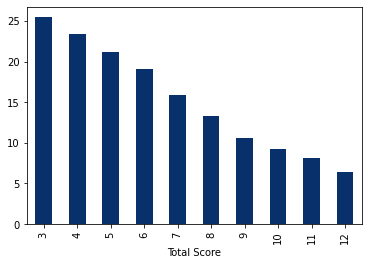

In [61]:
rfm_segmentation.groupby('Total Score').agg('Recency').mean().plot(kind='bar', colormap='Blues_r')